In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

In [6]:
df=pd.read_csv("Treatment.csv")

In [70]:
df.head()

,Name,Gender,Age,Fitness,Sugar Level,BP Level,Treatment,Test Score
0,Mary,Female,36,Moderate,72,91,A,75.608235
1,Mary,Female,50,Not even,85,95,A,76.478917
2,Mary,Female,52,Fit,147,127,C,83.930420
3,Susan,Female,36,More fit,88,114,A,76.848161
4,Susan,Female,42,Fit,107,120,B,72.357374


In [71]:
df.shape

(50, 8)

In [72]:
df.describe(include="all")

,Name,Gender,Age,Fitness,Sugar Level,BP Level,Treatment,Test Score
count,50,50,50.000000,50,50.000000,50.00000,50,50.000000
unique,10,2,NaN,4,NaN,NaN,3,NaN
top,Lisa,Female,NaN,Fit,NaN,NaN,B,NaN
freq,7,28,NaN,19,NaN,NaN,19,NaN
mean,NaN,NaN,48.000000,NaN,110.980000,110.16000,NaN,79.103392
std,NaN,NaN,18.784492,NaN,22.859366,14.10364,NaN,5.738081
min,NaN,NaN,18.000000,NaN,70.000000,90.00000,NaN,69.731136
25%,NaN,NaN,36.000000,NaN,93.000000,97.25000,NaN,75.582984
50%,NaN,NaN,50.000000,NaN,111.500000,108.00000,NaN,77.783197
75%,NaN,NaN,62.750000,NaN,127.750000,120.75000,NaN,83.140302


In [73]:
df["Treatment"].value_counts()

B    19
A    17
C    14
Name: Treatment, dtype: int64

In [74]:
df.isnull().sum()

Name           0
Gender         0
Age            0
Fitness        0
Sugar Level    0
BP Level       0
Treatment      0
Test Score     0
dtype: int64

In [75]:
df.duplicated().sum()

0

# EDA

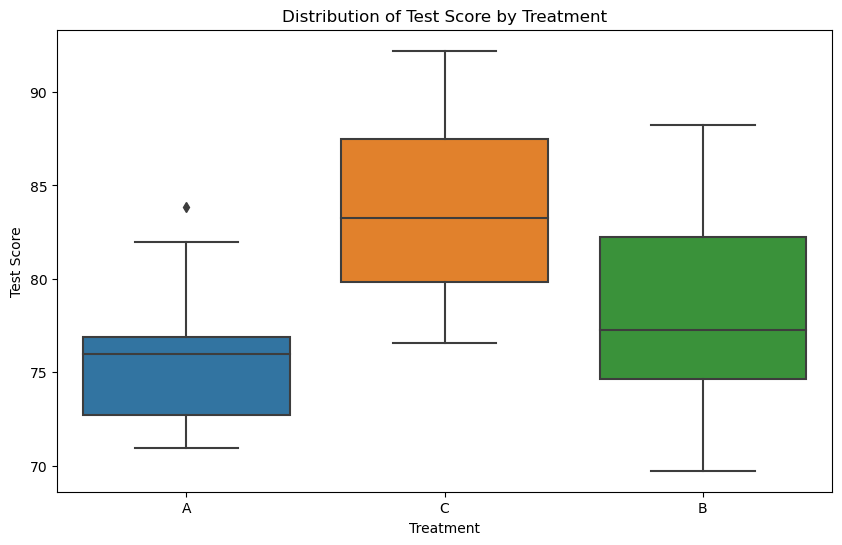

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Treatment', y='Test Score', data=df)
plt.title('Distribution of Test Score by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Test Score')
plt.show()


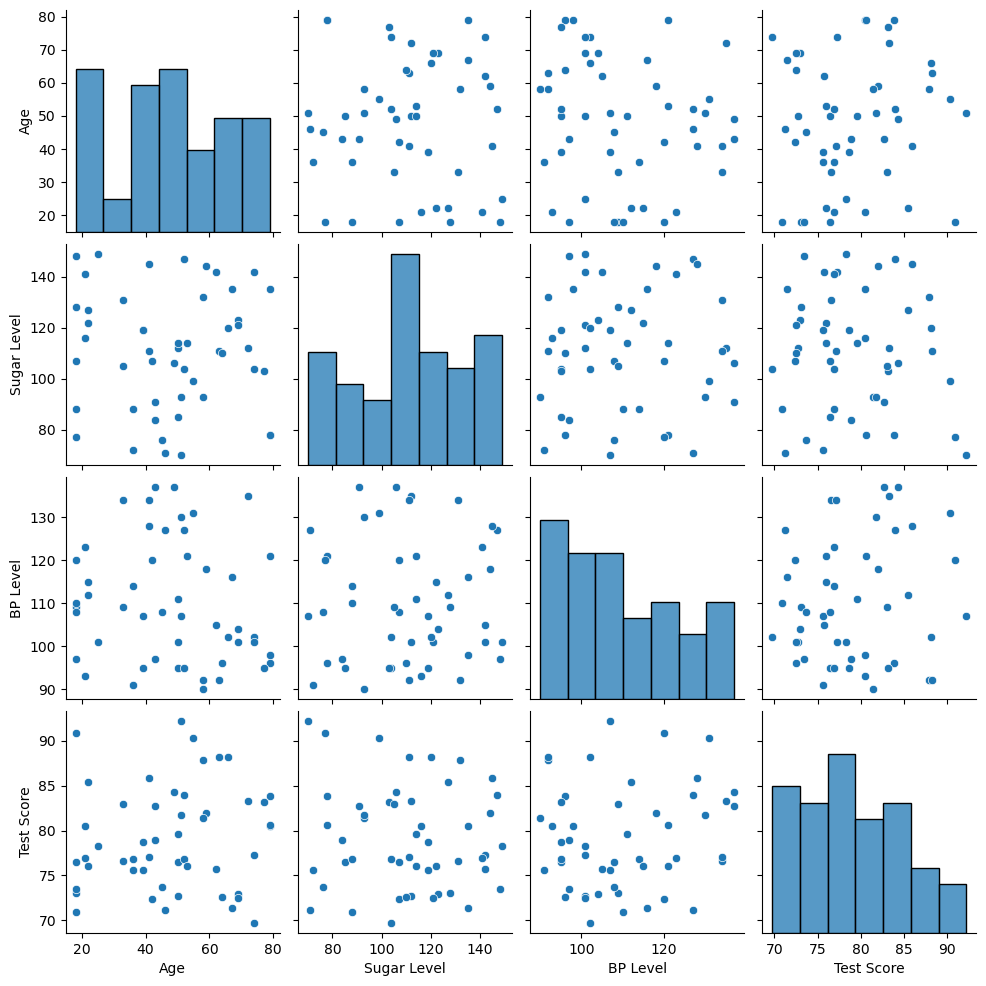

In [77]:
sns.pairplot(df[['Age', 'Sugar Level', 'BP Level', 'Test Score']])
plt.show()

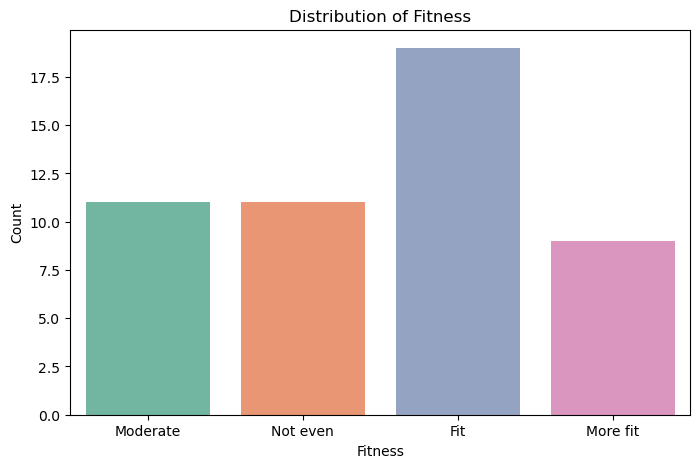

In [78]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Fitness', data=df, palette='Set2')
plt.title('Distribution of Fitness')
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.show()

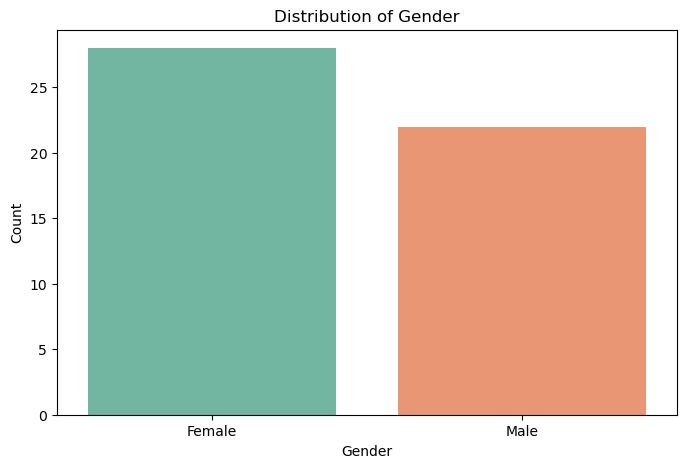

In [81]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [33]:
df['Test_Score']=df['Test Score']

In [37]:
df.drop('Test Score',axis=1,inplace=True)

In [40]:
from statsmodels.formula.api import ols
import statsmodels.api as sm 
formula = 'Test_Score ~ C(Gender) + C(Fitness) + C(Gender):C(Fitness)'
model = ols(formula, data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)


print("Two-Way ANOVA Table:")
print(anova_table)


Two-Way ANOVA Table:
                           sum_sq    df         F    PR(>F)
C(Gender)                2.905213   1.0  0.097573  0.756308
C(Fitness)             277.345006   3.0  3.104912  0.036560
C(Gender):C(Fitness)    72.542401   3.0  0.812121  0.494360
Residual              1250.544522  42.0       NaN       NaN


In [47]:
alpha=0.05


# Hypothesis testing based on p-values
if anova_table['PR(>F)']['C(Fitness)'] < alpha:
    print("Hypothesis rejected: There is a significant difference in test scores based on Fitness.")
else:
    print("Hypothesis accepted: There is no significant difference in test scores based on Fitness.")

if anova_table['PR(>F)']['C(Gender):C(Fitness)'] < alpha:
    print("Hypothesis rejected: There is a significant interaction effect between Gender and Fitness on Test Scores.")
else:
    print("Hypothesis accepted: There is no significant interaction effect between Gender and Fitness on Test Scores.")


Hypothesis rejected: There is a significant difference in test scores based on Fitness.
Hypothesis accepted: There is no significant interaction effect between Gender and Fitness on Test Scores.


In [43]:
# The Hypothesis is acquired therefore the Two Way Anova has been executed 

In [48]:
#With These analysis we know that there is difference in the mean of the Fitness on the test score 